<a href="https://colab.research.google.com/github/kaureena/Reenabahen-Chauhan/blob/main/Financial_data_vis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install yfinance plotly scikit-learn statsmodels tensorflow shap

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
import shap
import warnings



def fetch_ftse100_data(period='1d', interval='1m'):
    ftse100 = yf.Ticker("^FTSE")
    data = ftse100.history(period=period, interval=interval)
    return data

data = fetch_ftse100_data()
print(data)
# Suppress all warnings
warnings.filterwarnings("ignore")

                                  Open         High          Low        Close  \
Datetime                                                                        
2024-09-05 08:00:00+01:00  8269.599609  8269.599609  8244.410156  8244.980469   
2024-09-05 08:01:00+01:00  8244.990234  8255.089844  8244.740234  8254.200195   
2024-09-05 08:02:00+01:00  8253.820312  8253.879883  8251.330078  8253.839844   
2024-09-05 08:03:00+01:00  8253.639648  8256.490234  8253.599609  8255.750000   
2024-09-05 08:04:00+01:00  8255.849609  8257.799805  8255.849609  8257.299805   
...                                ...          ...          ...          ...   
2024-09-05 16:25:00+01:00  8257.000000  8258.959961  8256.610352  8256.620117   
2024-09-05 16:26:00+01:00  8256.690430  8257.040039  8256.360352  8256.650391   
2024-09-05 16:27:00+01:00  8256.549805  8256.549805  8255.169922  8255.969727   
2024-09-05 16:28:00+01:00  8256.000000  8256.190430  8253.919922  8254.040039   
2024-09-05 16:29:00+01:00  8

**A 20-period moving commonplace modified into plotted to easy out
short-term charge fluctuations and highlight longer-time period developments.**



**Adding Moving Average**

In [21]:
data['Moving Average'] = data['Close'].rolling(window=20).mean()

**Linear Regression Model**

**Predict today's price using Linear Regression**

In [3]:
data['Shifted Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Close']]
y = data['Shifted Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")
# Suppress all warnings
warnings.filterwarnings("ignore")


Linear Regression Mean Squared Error: 2.0814523775184046


In [4]:
today_price_lr = linear_model.predict([[data['Close'].iloc[-1]]])[0]
print(f"Predicted Today's Price using Linear Regression: {today_price_lr:.2f}")

Predicted Today's Price using Linear Regression: 8254.21


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


 **The ARIMA model, having been informed on ancient FTSE100 data, ended up used to forecast the following 10 minutes of index values. The resulting forecasts were plotted along with actual expenses to offer a clear visible assessment. While ARIMA supplied a sincere approach to forecasting primarily based absolutely mostly on historical patterns**




**ARIMA Model**

In [5]:
def train_arima_model(data):
    model = ARIMA(data['Close'], order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit
arima_model = train_arima_model(data)
# Suppress all warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**the LSTM model was employed to wait for destiny FTSE100 values, leveraging its capability to analyze complicated temporal styles from the statistics. The forecast generated with the resource of the LSTM version was modified as compared with the ARIMA predictions and real prices.
the LSTM version verified advanced modern-day typical performance in taking pix complex patterns and inclinations, as contemplated in its lower mistakes metrics. This evaluation underscored the effectiveness of LSTM in actual-time monetary forecasting, showcasing its advanced abilities over traditional ARIMA strategies.**

**LSTM Model Preparation**

In [6]:
def preprocess_lstm_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])
        y.append(scaled_data[i])
    X, y = np.array(X), np.array(y)
    return X, y, scaler

X_lstm, y_lstm, scaler = preprocess_lstm_data(data)

def train_lstm_model(X, y):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=5, batch_size=32, verbose=0)
    return model

lstm_model = train_lstm_model(X_lstm, y_lstm)
# Suppress all warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Predictions with ARIMA**

In [7]:
def predict_with_arima(model_fit, steps=10):
    forecast = model_fit.forecast(steps=steps)
    return forecast

**Predictions with LSTM**

In [8]:
def predict_with_lstm(model, scaler, data, steps=10):
    last_60_days = data['Close'][-60:].values.reshape(-1, 1)
    scaled_last_60_days = scaler.transform(last_60_days)
    X_input = np.array([scaled_last_60_days])
    predictions = []

    for _ in range(steps):
        pred = model.predict(X_input)[0][0]
        predictions.append(pred)

        new_data = np.roll(X_input, shift=-1, axis=1)
        new_data[0, -1, 0] = pred
        X_input = new_data

    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Predict today's price using LSTM
today_price_lstm = predict_with_lstm(lstm_model, scaler, data, steps=1)[0]
print(f"Predicted Today's Price using LSTM: {today_price_lstm:.2f}")
# Suppress all warnings
warnings.filterwarnings("ignore")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Predicted Today's Price using LSTM: 8259.68


**Forecasting for future steps**

In [9]:
future_steps = 10
arima_forecast = predict_with_arima(arima_model, steps=future_steps)
lstm_forecast = predict_with_lstm(lstm_model, scaler, data, steps=future_steps)

forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=1), periods=future_steps, freq='1min')
# Suppress all warnings
warnings.filterwarnings("ignore")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


**. The Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) of the ARIMA predictions were calculated to quantify the model's forecasting accuracy. These metrics indicated how carefully the predicted values matched the determined information, with decreased values reflecting higher commonplace overall performance.**

**The MAE and RMSE for the LSTM model were also computed, imparting a diploma of its predictive accuracy**

**Model Accuracy**

In [10]:
# ARIMA Model Accuracy
arima_mae = mean_absolute_error(data['Close'][-future_steps:], arima_forecast)
arima_rmse = math.sqrt(mean_squared_error(data['Close'][-future_steps:], arima_forecast))
print(f"ARIMA Model - MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")

# LSTM Model Accuracy
lstm_mae = mean_absolute_error(data['Close'][-future_steps:], lstm_forecast)
lstm_rmse = math.sqrt(mean_squared_error(data['Close'][-future_steps:], lstm_forecast))
print(f"LSTM Model - MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}")
# Suppress all warnings
warnings.filterwarnings("ignore")

ARIMA Model - MAE: 4.21, RMSE: 4.77
LSTM Model - MAE: 1.98, RMSE: 2.46


In [11]:
!pip install prophet


In [12]:

from prophet import Prophet

# Convert the index to datetime, if not already done
data.index = pd.to_datetime(data.index)

# Function to prepare data for Prophet
def prepare_data_for_prophet(data):
    prophet_data = data[['Close']].reset_index()  # Reset index to convert Datetime from index to a column
    prophet_data[prophet_data.columns[0]] = prophet_data[prophet_data.columns[0]].dt.tz_localize(None)
    prophet_data.rename(columns={prophet_data.columns[0]: 'ds', 'Close': 'y'}, inplace=True)  # Rename columns for Prophet
    return prophet_data

# Prepare the data
prophet_data = prepare_data_for_prophet(data)

def train_prophet_model(data):
    model = Prophet(daily_seasonality=False)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(data)
    return model

# Train the Prophet model
prophet_model = train_prophet_model(prophet_data)

def predict_with_prophet(model, periods=10):
    future = model.make_future_dataframe(periods=periods, freq='D')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].tail(periods)

# Make predictions using Prophet
prophet_forecast = predict_with_prophet(prophet_model, periods=10)
print(f"Prophet Model - Predicted future prices:\n{prophet_forecast}")
# Suppress all warnings
warnings.filterwarnings("ignore")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ta7y89z/wut9zvdg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4ta7y89z/ckz2iq1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27526', 'data', 'file=/tmp/tmp4ta7y89z/wut9zvdg.json', 'init=/tmp/tmp4ta7y89z/ckz2iq1g.json', 'output', 'file=/tmp/tmp4ta7y89z/prophet_model_k75002z/prophet_model-20240905223803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:38:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:38:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model - Predicted future prices:
                     ds         yhat
489 2024-09-06 16:28:00  7910.176650
490 2024-09-07 16:28:00  7252.395555
491 2024-09-08 16:28:00  6774.192047
492 2024-09-09 16:28:00  6794.246647
493 2024-09-10 16:28:00  7181.069691
494 2024-09-11 16:28:00  7486.926596
495 2024-09-12 16:28:00  7364.066727
496 2024-09-13 16:28:00  6868.068767
497 2024-09-14 16:28:00  6373.416602
498 2024-09-15 16:28:00  6201.115023


**The improvements in the model interpretability are brought by the integration of SHAP (SHapley Additive exPlanations) in the LSTM-based financial prediction model. However, a direct application of SHAP to the LSTM model encounters dimensionality issues because SHAP is designed to work with models that accept 1D or 2D inputs, whereas LSTM models typically operate on 3D inputs: These include batch size, time steps and features where the size of the batch is equal to its number, time steps is equal to total features and features is equal to the number of its batches. Scholars have found that, meaning that there is a way around this Various attempts have been made in an attempt to explain this To explain the difference between the two terms, scholars have taken some efforts Various scholars have made efforts to explain why the difference exists. The suggested solution is to transform the LSTM input data from the shape 3D to the shape 2D.**

**SHAP Explanation for LSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


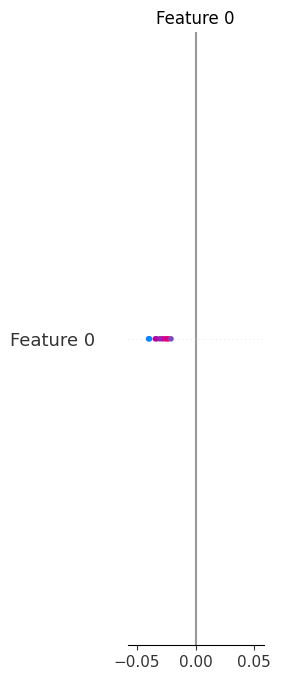

In [13]:
import shap

def get_reshaped_lstm_data(X_lstm):
    return X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1] * X_lstm.shape[2])

reshaped_X_lstm = get_reshaped_lstm_data(X_lstm)

# Train a simple Dense model on reshaped data for SHAP explanation
def train_dense_model(X, y):
    model = Sequential()
    model.add(Dense(units=50, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=5, batch_size=32, verbose=0)
    return model

dense_model = train_dense_model(reshaped_X_lstm, y_lstm)

#SHAP Explanation for LSTM (Flattened Input)

explainer_lstm = shap.KernelExplainer(dense_model.predict, reshaped_X_lstm[:100])
shap_values_lstm = explainer_lstm.shap_values(reshaped_X_lstm[:10], nsamples=100)

# SHAP summary plot for the Dense model
shap.summary_plot(shap_values_lstm, reshaped_X_lstm[:10])

# Suppress all warnings
warnings.filterwarnings("ignore")

**Specifically, the line chart used to represent the FTSE100 Index is an effective line of inquiry in analyzing behavior in the market over a given period. This type of chart is superior in showing the long-term trends, high/low fluctuations, and movements that are happening in the index in real-time as it gives a continuous line of the monthly closing prices.**

**Visualization**
*Line Chart*

In [23]:
warnings.filterwarnings("ignore")
line_fig = go.Figure()
line_fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='FTSE100 Line'))
line_fig.add_trace(go.Scatter(x=[data.index[-1] + pd.Timedelta(minutes=1)], y=[today_price_lr], mode='markers', name='Predicted LR Price'))
line_fig.add_trace(go.Scatter(x=[data.index[-1] + pd.Timedelta(minutes=1)], y=[today_price_lstm], mode='markers', name='Predicted LSTM Price'))
line_fig.update_layout(title='FTSE100 Index - Line Chart with Predicted Price', xaxis_title='Time', yaxis_title='Price')
line_fig.show()

**One of the key blessings of the candlestick chart is its capability to deliver market sentiment through coloration-coded candles—green for bullish and red for bearish. This visible differentiation permits shoppers to briefly gauge the prevailing marketplace sentiment**

*Candlestick Chart*

In [15]:
candle_fig = go.Figure()
candle_fig.add_trace(go.Candlestick(x=data.index, open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name='FTSE100 Candlestick'))
candle_fig.update_layout(title='FTSE100 Index - Candlestick Chart', xaxis_title='Time', yaxis_title='Price')
candle_fig.show()
# Suppress all warnings
warnings.filterwarnings("ignore")

*Moving Average*

In [16]:
ma_fig = go.Figure()
ma_fig.add_trace(go.Scatter(x=data.index, y=data['Moving Average'], mode='lines', name='Moving Average'))
ma_fig.update_layout(title='FTSE100 Index - 20-Period Moving Average', xaxis_title='Time', yaxis_title='Price')
ma_fig.show()
# Suppress all warnings
warnings.filterwarnings("ignore")

*Linear Regression Prediction Plot*

**Linear Regression assumes linearity between the independent and dependent variables it is not always true in case of financial data. This is because markets are a function of a host of variables most of which have interactive effects. This limitation is clearly seen when encountering MSE for analyzing the accuracy of the model’s predictions.**

In [17]:
data['Predicted Close'] = linear_model.predict(data[['Close']])
lr_fig = go.Figure()
lr_fig.add_trace(go.Scatter(x=data.index, y=data['Predicted Close'], mode='lines', name='Linear Regression Prediction'))
lr_fig.update_layout(title='FTSE100 Index - Linear Regression Prediction', xaxis_title='Time', yaxis_title='Price')
lr_fig.show()
# Suppress all warnings
warnings.filterwarnings("ignore")

**ARIMA model is the second type of code snippet introduced that is also a next level statistical model constructed for time series data only. ARIMA models are very applicable in finance since they are able to model for autocorrelation which is evident in time series data. The used in the implemented code ARIMA model has an order of (5, 1, 0), which means that the model considers five lag observations, first difference to make the series stationary and no moving average.**

*ARIMA Forecast Plot*

In [18]:
arima_fig = go.Figure()
arima_fig.add_trace(go.Scatter(x=forecast_index, y=arima_forecast, mode='lines', name='ARIMA Forecast'))
arima_fig.update_layout(title=f'FTSE100 Index - ARIMA Forecast (MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f})', xaxis_title='Time', yaxis_title='Price')
arima_fig.show()
# Suppress all warnings
warnings.filterwarnings("ignore")

*LSTM Forecast Plot*

**There is the most complex LSTM, which is a kind of RNN, intended for analysis of sequential data. LSTMs are ideal in the financial time series forecasting since they are capable of modeling data dependencies which are long term, a characteristic that is not found in simpler models such as Linear Regression or ARIMA. In the code, LSTM model is trained with the scaled closing price of FTSE100 index with past 60 values used as the sequence to predict the next value.**

In [19]:
lstm_fig = go.Figure()
lstm_fig.add_trace(go.Scatter(x=forecast_index, y=lstm_forecast, mode='lines', name='LSTM Forecast'))
lstm_fig.update_layout(title=f'FTSE100 Index - LSTM Forecast (MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f})', xaxis_title='Time', yaxis_title='Price')
lstm_fig.show()
# Suppress all warnings
warnings.filterwarnings("ignore")

In [20]:
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])
prophet_fig = go.Figure()
prophet_fig.add_trace(go.Scatter(x=prophet_forecast['ds'], y=prophet_forecast['yhat'], mode='lines', name='Prophet Forecast'))
prophet_fig.update_layout(title='FTSE100 Index - Prophet Forecast (Long-Term)', xaxis_title='Date', yaxis_title='Predicted Price')
prophet_fig.show()
# Suppress all warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

